In [61]:
cd /home/macbuse/Documents/ELLIPTIC

/home/macbuse/Documents/ELLIPTIC


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpmath import jtheta, pi, exp, sqrt, polyroots, agm, log


# p-function from theta function

I was originally using some code I found on Github 
[here](https://gist.github.com/stla/d771e0a8c351d16d186c79bc838b6c48)
but there were issues and so I had to recode from zero using the relation below:


$$ \wp (z,\tau )=\left(\pi \theta _{2}(0,q)\theta _{3}(0,q){\frac {\theta _{4}(\pi z,q)}{\theta _{1}(\pi z,q)}}\right)^{2}-{\frac {\pi ^{2}}{3}}\left(\theta _{2}^{4}(0,q)+\theta _{3}^{4}(0,q)\right)$$
[source](https://en.wikipedia.org/wiki/Weierstrass_elliptic_function#Relation_to_Jacobi's_theta_functions)

The code still uses [mpmath](https://mpmath.org/) to calculate the Jacobi theta functions.

The new code is a lot slower than using **ARB** in SAGE
I don't really understand as according to the author
he uses [the same relation pp9](https://arxiv.org/pdf/1806.06725.pdf).




In [2]:
from mpmath import jtheta, pi, exp, sqrt, polyroots, agm, log

def elliptic_p(q):
    q = exp(np.pi*1J*tau)
    # constant in z so precalculate
    tt = pi**2/3 * (jtheta(2,0,q)**4 + jtheta(3,0,q)**4)
    ff = pi * jtheta(2,0,q) * jtheta(3,0,q) 
    f = lambda z : (ff * jtheta(4,pi*z,q) / jtheta(1,pi*z,q))**2 - tt
    return f


In [100]:
f(.5)

mpc(real='6.8751858180203715', imag='0.0')

In [11]:
! ./.g

[main c77d2a6] elliptic stuff
 6 files changed, 908 insertions(+), 40 deletions(-)
 create mode 100644 .ipynb_checkpoints/air_pollution-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/modular_lambda-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/sage_elliptic-checkpoint.ipynb
Counting objects: 7, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 31.87 KiB | 10.62 MiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 3 local objects.
To https://github.com/macbuse/ELLIPTIC.git
   14960e8..c77d2a6  main -> main


In [3]:
from mpmath import jtheta, pi, exp

def elliptic_p(tau):
    q = exp(np.pi*1J*tau)
    # constant in z so precalculate
    add_const = pi**2/3 * (jtheta(2,0,q)**4 + jtheta(3,0,q)**4)
    mul_const = pi * jtheta(2,0,q) * jtheta(3,0,q) 
    f = lambda z : (mul_const * jtheta(4,pi*z,q) / jtheta(1,pi*z,q))**2 - add_const
    return f

def get_lambda(tau):
    #Using Komori-Sugawa, compute the position of punctures via Weierstrass pe-function(elliptic_p)
    f = elliptic_p(tau)
    e1 = f(0.5)
    e2 = f(tau/2)
    e3 = f((tau+1)/2)
    
    # this w is called  "elliptic modular function" or "modular lambda function".
    return (e3 - e2)/(e1 - e2)

get_lambda(1+1J), get_lambda(1J)

(mpc(real='-1.0', imag='1.495899156805095e-16'),
 mpc(real='0.50000000000000011', imag='-1.2539231017931536e-29'))

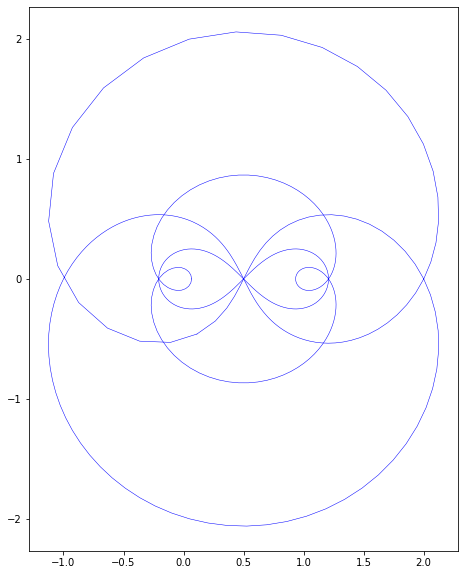

In [4]:
def fd_axis(A, num_pts=200):
    ''''find a fundamental domain for 
    A acting on its axis'''
    
    ta = abs(A.trace())
    if ta < 3:  return "not Anosov"
    
    # not efficient: find the power of A in Gamma(2)
    X = A.copy()
    for k in range(1,4):
        if np.all( (X % 2) == np.array([[1,0],[0,1]]) ): break
        X = A @ X
    
    #this allows one to determine the angle range using trig
    delta = np.arccos(2/np.abs(X.trace())) 
    T = np.linspace(np.pi/2 - delta , np.pi/2 + delta, num_pts)
            
    # Hyperbolic geodesic axis of A connecting roots of Az - z = 0
    center = (A[0,0]- A[1,1])/(A[0,1]*2)
    radius = np.sqrt((A[0,0] - A[1,1])**2 + 4*A[1,0]*A[0,1])/(A[0,1]*2)
    
    return radius*np.exp(1J*T) + center

A = np.array([[2,3],[1,2]])
B = np.array([[2,1],[1,1]])
C = np.array([[5,2],[2,1]])

fig, ax  = plt.subplots(1, figsize=(30, 10))
ax.set_aspect('equal')

for X  in  [A,B,C]:

    TS = [ get_lambda(w) for w in fd_axis(X)]
    W  = np.array([complex(z) for z in TS])

    ax.plot(W.real, W.imag,color="blue", lw = 0.5);

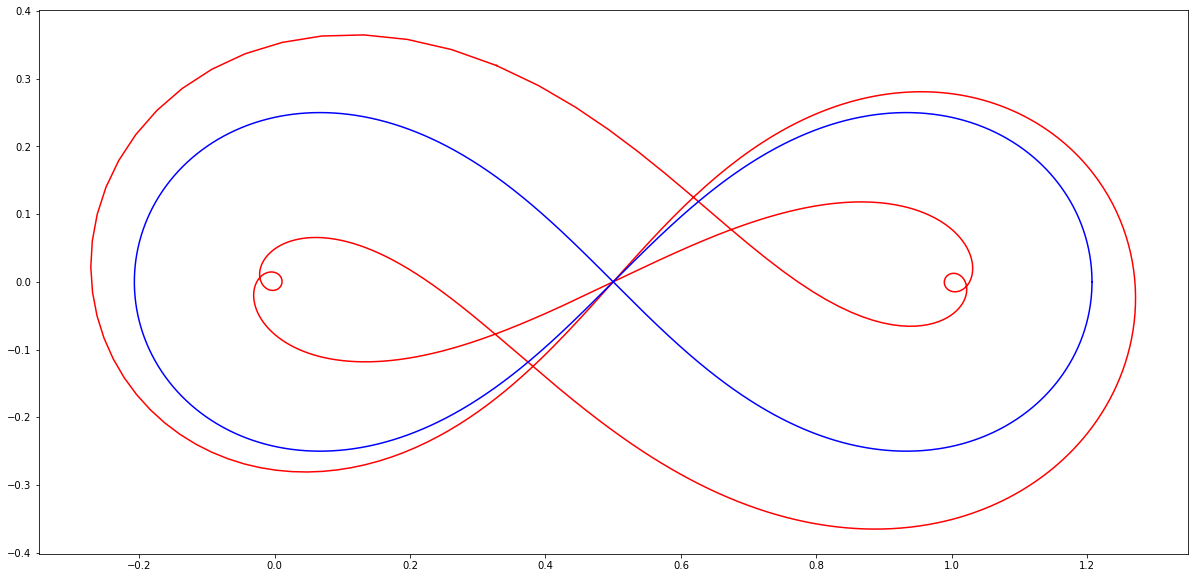

In [5]:
A = np.array([[1,2],[0,1]])
B = A.T


fig, ax  = plt.subplots(1, figsize=(30, 10))
ax.set_aspect('equal')

cc = 'rb'

for k,X  in  enumerate([A @ B @ A @ A @ B @ B, A @ B]):

    Z = fd_axis(X,num_pts=3000)

    TS = [ get_lambda(w) for w in Z[:]]
    W  = np.array([complex(z) for z in TS])
    ax.plot(W.real, W.imag,cc[k %2])